In [1]:
import numpy as np
import cv2, time

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [8]:
cap = cv2.VideoCapture(1)
cap.set(3,256)
cap.set(4,384)
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    res = str(NR.test(frame[52:68,-94:-10,:]))
    cv2.putText(frame,res,(0,220), cv2.FONT_HERSHEY_DUPLEX, 1,(0,255,0),2)
    # Display the resulting frame
    cv2.imshow('frame',frame)
   
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    elif cv2.waitKey(1) & 0xFF == ord('o'):
        print(res)

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [2]:
from id_number import NumberRecog

In [7]:
NR = NumberRecog('../masks')

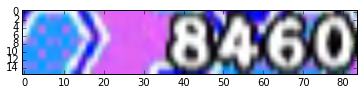

In [6]:
 plt.imshow(frame[52:68,-94:-10,:])

In [7]:
print(NR.no_imgs[0].shape)
print()

(16, 12, 3)



In [8]:
NR.test_img(frame[52:68,-94:-10,:])

8460